# Esercitazione 6: simulazione del modello di Ising in $d=1$

In Meccanica Statistica il Modello di Ising unidimensionale (1D) è esattamente risolvibile. L'Hamiltoniana per un sistema di N spin con interazione tra vicini più prossimi è data da (assumo unità tali che $\mu_B=1$ e $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

dove $\{ s_i \}_{i=1,N}$ sono variabili di spin che assumono valori in $\{-1;1\}$, $J>0$ (modello ferromagnetico), e ponendo $s_{N+1} = s_{1}$.

La funzione di partizione per $N$ spin, $Z$, si può calcolare esattamente ed è:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

dove
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
e dove $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Una volta che la funzione di partizione è stata calcolata, l'energia libera di Helmholtz si ottiene facilmente come $A = -k_B T \ln Z$. Tutte le grandezze termodinamiche di interesse possono essere dedotte da $A$ o, equivalentemente, da $Z$:

- l'**Energia Interna** per spin (con $h=0$):

\begin{eqnarray}
\frac{U(N,T)}{N} &=& \frac{\langle H \rangle}{N}\\
&=& \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\\
&=& -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}\\
&\underset{h=0}=& -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)\\
\end{eqnarray}

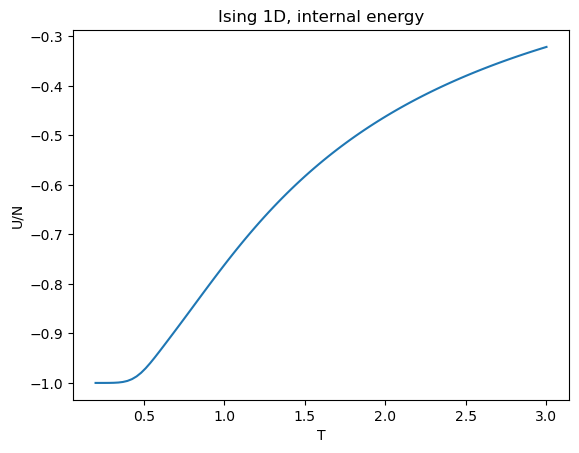

In [7]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e)
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

- la **Capacità termica** (with $h=0$):

\begin{eqnarray}
C(N,T) &=& \frac{\partial U(N,T)}{\partial T}\\
&=& \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}\\
&=& -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right]  \\
&=& -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right]  \\
&=& k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} \\
&=& k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} \\&=&
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
\end{eqnarray}

\begin{eqnarray}
\frac{C(N,T)}{N} &=& \frac{1}{N}\frac{\partial U(N,T)}{\partial T} \\
&\underset{h=0}= &
k_B (\beta J)^2 \Bigg\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+ \\&&+
(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \Bigg\}
\end{eqnarray}

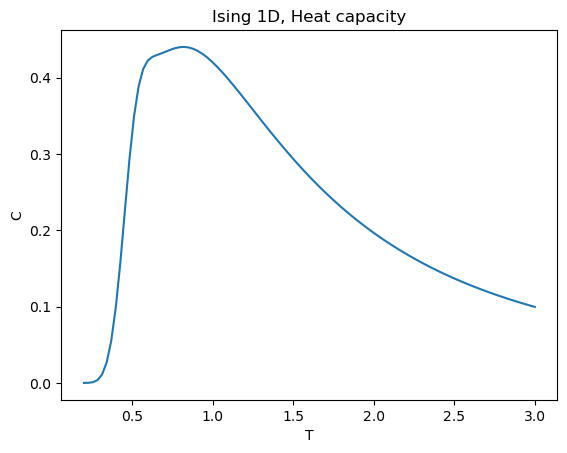

In [8]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat)
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.show()

- **La magnetizzazione** (con $h \neq 0$):

Nota che con $h=0$ la magnetizzazione $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ perché in 1D non possiamo avere una transizione di fase (ferromagnetica) in assenza di un campo magnetico esterno.

\begin{eqnarray}
M(N,T,h) & = & -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} \\
& = & \frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) \\
& = & \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} \\
& = & \left\langle \sum_{i=1,N}s_i \right\rangle
\end{eqnarray}

La formula esatta da $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ è:
\begin{eqnarray}
\frac{M(N,T,h)}{N} & = & \frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Biggl[\lambda_1^{N-1}\cdot \Biggl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Biggr) \\
&& + \lambda_2^{N-1}\cdot \Biggl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Biggr)\Biggr]
\end{eqnarray}

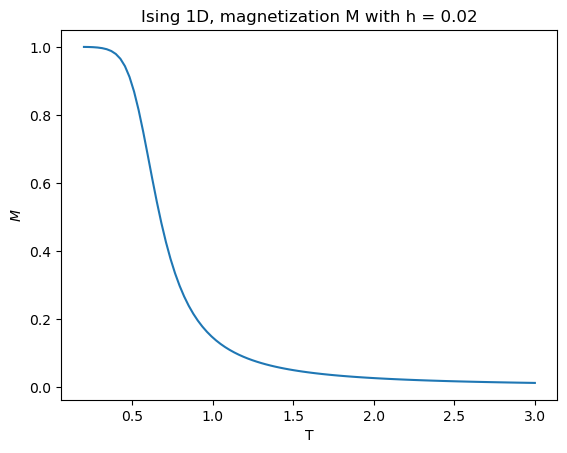

In [9]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M)
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()

- **La suscettibilità magnetica** (con $h=0$):

\begin{eqnarray}
\chi(N,T) & = & \frac{\partial M}{\partial h} \\
& = & \frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} \\
& = & \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z} - \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} \frac{1}{Z}\frac{\partial Z}{\partial h} \\
& = & \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] \\
 & \underset{h=0}=& \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] \\
& = & \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
\end{eqnarray}

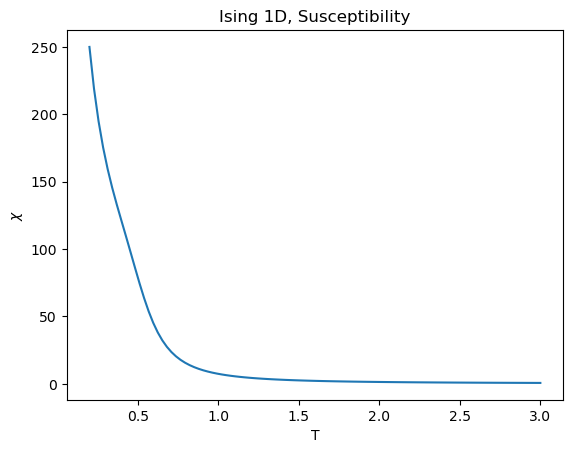

In [10]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X)
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.show()

# Il metodo di Gibbs

Il campionamento di Gibbs, noto anche come algoritmo di bagno termico, è concettualmente il più semplice tra i metodi di campionamento basati su catene di Markov. È ampiamente applicabile a problemi in cui le variabili assumono valori da un insieme finito piccolo, o hanno distribuzioni di probabilità condizionali di una forma facilmente campionabile. In pratica, può essere visto come un **caso particolare dell'algoritmo di Metropolis in cui la mossa proposta è sempre accettata**. Il campionatore di Gibbs esegue questo sostituendo ripetutamente ciascun componente con un valore scelto dalla sua distribuzione condizionale sui valori correnti di tutti gli altri componenti.

Questo processo può essere visto come la generazione di una realizzazione di una catena di Markov costruita da un insieme di probabilità di transizione di base $ T_k $ per $ k = 1, \ldots, n $ con
$$ T_k (\mathbf{x} | \mathbf{y}) = p_{1|n-1}(x_k \mid \{y_i:i\neq k\}) \prod_{i \neq k} \delta(x_i - y_i) $$
dove $ T_k $ lascia invariati tutti i componenti eccetto $ y_k $ e seleziona un nuovo $ y_k \rightarrow x_k $ dalla sua distribuzione condizionale sui valori correnti di tutti gli altri componenti. Questo è presupposto essere un'operazione fattibile.

Queste transizioni di base sono solitamente applicate in sequenza, sebbene ad ogni passo si possa scegliere $ T_k $ a caso. Per semplicità, inizieremo a discuterne concretamente in due dimensioni: Supponiamo di voler campionare dalla distribuzione congiunta $ p(x_1, x_2) $, dove l'intervallo degli $ x_i $ può essere continuo o discreto. Ricordiamo che, per esempio, la distribuzione di probabilità condizionale di $ x_1 $ dato $ x_2 $ è data dal rapporto 
$ p_{1|1}(x_1 \mid x_2) = \frac{p(x_1, x_2)}{p_1(x_2)} $
dove $$ p_1(x_2) =\int p(x_1,x_2)dx_1$$ è la distribuzione marginale per la variabile $ x_2 $. Ricordiamo anche che $ p_{1|1}(x_1 \mid x_2) $ è una distribuzione di probabilità una volta che $ x_2 $ è stato fissato.

Il primo passo dell'algoritmo di campionamento di Gibbs consiste nello scegliere una posizione iniziale, come si fa di solito anche per il Metropolis, fissando la variabile $ x_2 $ e campionando $ x_1 $ da $ p_{1|1}(x_1 \mid x_2^0) $.

Il secondo passo consiste nel fissare la variabile $ x_1 $ e campionare $ x_2 $ dalla distribuzione di probabilità $ p_{1|1}(x_2 \mid x_1^1) $. Dopo aver aggiornato tutte le variabili, l'algoritmo ricomincia, realizzando il campionamento di $ p(x_1, x_2) $. L'algoritmo funziona se siamo in grado di campionare dalle $T_k $.

Generalizzando in $ \mathbb{R}^n $ abbiamo:

\begin{aligned}
    x_1^{(t+1)} &\sim p(x_1 \mid x_2^{(t)}, x_3^{(t)}, \ldots, x_n^{(t)}) \\
    x_2^{(t+1)} &\sim p(x_2 \mid x_1^{(t+1)}, x_3^{(t)}, \ldots, x_n^{(t)}) \\
    x_3^{(t+1)} &\sim p(x_3 \mid x_1^{(t+1)}, x_2^{(t+1)}, x_4^{(t)}, \ldots, x_n^{(t)}) \\
    &\vdots \\
    x_n^{(t+1)} &\sim p(x_n \mid x_1^{(t+1)}, x_2^{(t+1)}, \ldots, x_{n-1}^{(t+1)})
\end{aligned}


### Campionamento di Gibbs e modello di Ising
Il modello di Ising fornisce un semplice esempio di campionamento di Gibbs. Per simulare questo sistema, come per l'algoritmo di Metropolis, si selezionano inizialmente i valori degli spin $ s_i $ secondo una distribuzione iniziale, una configurazione iniziale che deve essere equilibrata. Si visitano poi ripetutamente i vari spin, in un ordine predefinito o scegliendo uno spin a caso ogni volta. Quando lo spin $s_i $ viene visitato, si sceglie, indipendentemente dal suo valore attuale, un nuovo valore per esso, dalla distribuzione condizionale definita dagli altri spin vicini (heat-bath).

\begin{eqnarray}
p(\mathbf{s}_k \mid \{ s_j : j \ne k \}) &:=& \frac{p(s_1, \ldots, s_k, \ldots, s_N)}{p(s_1, \ldots, s_k = +1, \ldots, s_N) + p(s_1, \ldots, s_k = -1, \ldots, s_N)} 
\\&=& \frac{e^{\beta J \sum_{i \ne k} s_i s_j}}{e^{\beta J \sum_{i \ne k} s_i s_j} \big|_{s_k = +1} + e^{\beta J \sum_{i \ne k} s_i s_j} \big|_{s_k = -1}}
\end{eqnarray}

\begin{eqnarray}
p(\mathbf{s}_k = \pm 1 \mid \{ s_j : j \ne k \}) &=& \frac{1}{1 + \exp\left(-\beta \Delta E (s_k = \mp 1 \to s_k = \pm 1)\right)} 
\\&=& \frac{1}{1 + \exp\left(\mp 2\beta J \sum_{i \text{ (p.v. di } k)} s_i\right)}
\end{eqnarray}

Queste probabilità di transizione, una volta calcolate, ci permettono di campionare $s_k $ accettando sempre la mossa proposta! E così via per gli altri spin.

Ho completato il codice C++ che simula il modello di Ising 1D con
- l'algoritmo di campionamento di Metropolis e
- l'algoritmo di campionamento di Gibbs

per campionare il peso di Boltzmann $$p(\{ s_i \}) = \exp(-\beta H)/Z$$
aggiungendo anche la possibilità di ripartire da una configurazione precedente degli spin.

Oltre al calcolo dell'energia interna $U(N,T) = \langle H \rangle$, ho aggiunto il calcolo di $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ e ho calcolato:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

come funzione di $T$ nell'intervallo $\left[0.5;2.0\right]$ per un sistema di $N=50$ spin con $J=1$.

Ho utilizzato il blocking dei dati per ottenere una stima delle incertezze statistiche. Un passo Monte Carlo consisterà nel tentativo di invertire una volta tutti gli spin del sistema. Ho precedentemente equilibrato le simulazioni e ho usato la media a blocchi con blocchi sufficientemente grandi.

# Dopo aver eseguito l'equilibrazione, illustro l'andamento qualitativo delle osservabili termodinamiche
<br>

Nel seguente grafico è mostrato il risultato di un esperimento su una catena di $N=50$ spin sottoposte alle seguenti condizioni:

- Temperatura <b>$T = 2.0$</b>
- Intensità dell'accoppiamento tra primi vicini <b>$J = 1$</b>
- Campo magnetico esterno <b>$h = 0.0$</b>

L'esperimento consta di $Nstep=20000$ passi Monte Carlo, e il sistema è stato evoluto a ogni passo usando l'algoritmo di Metropolis.

<br>
A ogni passo dell'esperimento sono misurate sulla catena di spin le seguenti quantità osservabili macroscopiche:

- <b>Energia</b> 
$$
U(N,T) = \langle H \rangle = 
\langle
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
\rangle
$$

- <b>Capacità termica</b>, cioè risposta in energia corrispondente a una certa variazione della temperatura cui è sottoposto il sistema 
$$
C(N,T) = \frac{\partial U(N,T)}{\partial T} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

- <b>Magnetizzazione</b>
$$
M(N,T,h) = -\frac{\partial A}{\partial h} =
\left\langle \sum_{i=1,N}s_i \right\rangle
$$

- <b>Suscettibilità magnetica</b>, cioè risposta in magnetizzazione corrispondente a una certa variazione del campo magnetico esterno 
$$
\chi(N,T) = \frac{\partial M}{\partial h} 
= \beta \langle M^2 \rangle
$$

Queste osservabili sono valutate tutte a campo magnetico $h=0$, eccetto la magnetizzazione, che darebbe $0$ a campo nullo.
Sono tutte espresse per grado di libertà (cioè il valore misurato è stato diviso per $N=50$).

<br>
Il sistema è stato precedentemente lasciato evolvere per un buon numero di passi Monte Carlo a queste condizioni, fino a raggiungere un certo stato di equilibrio. Perciò si osserva una certa stabilità delle osservabili misurate.

<br>
Tutte queste informazioni sono contenute nel file <i>input.dat</i> che è stato passato al programma.


In questo file di configurazione è anche indicata la frequenza con cui dev'essere stimato l'errore sulla media delle osservabili misurate durante il progredire della simulazione.

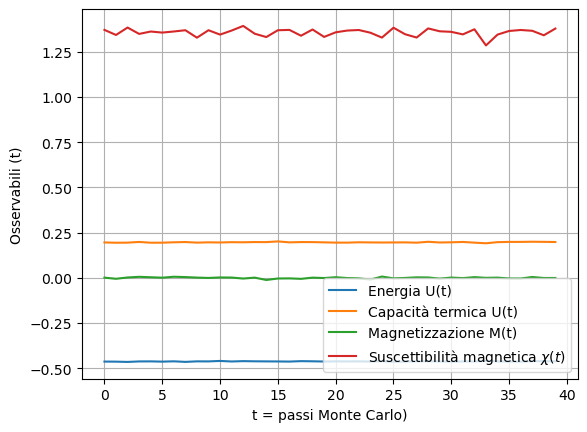

In [12]:
# Carico i file con le misure ottenute con Monte Carlo Ising 1D
# T=2, N=50spin, J=1, h=0.0, con 20000 passi dell'algoritmo
# Monte Carlo Metropolis, media stimata su 40 blocchi,
# configurazione già equilibrata

_ene = np.loadtxt(fname = "risultati/output.ene.0", usecols=(1))
_heat = np.loadtxt(fname = "risultati/output.heat.0", usecols=(1))
_mag = np.loadtxt(fname = "risultati/output.mag.0", usecols=(1))
_chi = np.loadtxt(fname = "risultati/output.chi.0", usecols=(1))

# Grafico delle misure

x = np.arange(len(_ene))  # tempo Monte Carlo
plt.errorbar(x,_ene, label ="Energia U(t)" )
plt.errorbar(x,_heat, label="Capacità termica U(t)")
plt.errorbar(x,_mag, label="Magnetizzazione M(t)")
plt.errorbar(x,_chi, label="Suscettibilità magnetica $\chi(t)$")

plt.xlabel('t = passi Monte Carlo)')
plt.ylabel('Osservabili (t)')
plt.grid(True)

plt.legend(loc="lower right")
plt.show()

### Illustro la stima delle incertezze

Una volta che il sistema ha raggiunto un certo stato di equilibrio posso considerare buona la misura delle osservabili. La loro stima è data dalla <b>media</b> delle misure prese a ciascun passo. Raggruppo le misure in blocchi e le uso per valutare l'<b>incertezza su questa stima</b>.
<br>
Nel seguente grafico è riportato l'andamento di questa media delle misure di energia, riportate nel grafico precedente, con la sua incertezza, durante il progredire della simulazione.

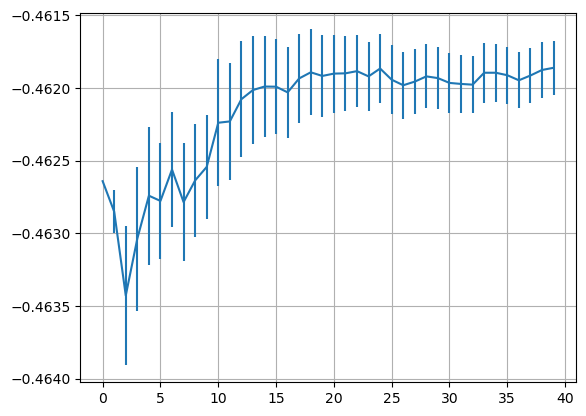

In [14]:
# Grafico della media dell'energia con la sua incertezza

medieEnergia = np.loadtxt(fname = "risultati/output.ene.0", usecols=(2))
incertezzeEnergia = np.loadtxt(fname = "risultati/output.ene.0", usecols=(3))

plt.errorbar(x,medieEnergia, incertezzeEnergia)
plt.grid(True)
plt.show()

### Illustro l'esecuzione del programma per varie condizioni esterne

Il programma <font face="courier">Monte_Carlo_ISING_1D.cpp</font> prende in ingresso il file <font face="courier">input.dat</font>, contenente in particolare le condizioni di temperatura $T$ e campo magnetico $h$, oltre che certi numeri da usare come semi della generazione di numeri casuali.

Restituisce in uscita un file <font face="courier">config.final</font>, contenente la configurazione della catena di spin raggiunta al termine dell'ultima esecuzione, e quattro file contenenti le misure di ciascuna quantità osservabile prese durante l'ultima esecuzione del programma, con le loro incertezze (sono le quattro curve mostrate nel grafico iniziale).

Per ciascuna di queste quattro collezioni di misure c'interessa in effetti solo l'ultimo valore medio con la sua incertezza, ossia l'ultimo valore delle colonne 2 e 3 (se numero le colonne a partire da zero). Questo valore costituisce un punto nel grafico $U(T)$ (se l'osservabile è ad esempio l'energia).

Vogliamo ora verificare che questi punti per un numero sufficiente di passi della simulazione si avvicinano arbitrariamente, e compatibilmente con le loro incertezze, alle curve teoriche riportate all'inizio. Quindi serve uno script che esegua il nostro programma tante volte quanti sono i valori di temperatura ai quali ci interessa stimare l'osservabile.

Per prima cosa dunque ci serve una semplice <i>routine</i> che permetta di impostare da qui la temperatura e le altre condizioni cui è sottoposto il sistema, cioè di modificare il file <font face="courier">input.dat</font>.

In [15]:
import subprocess
from os import path

# Funzione per scrivere automaticamente il file "input.dat"
def WriteInputValues(_temp=2, _nspin=50,                  \
                     _J=1.0, _h=0.0,                      \
                     _metro=1, _nstep=20000,              \
                     _nblk=40, _restart=1, _deleteData=1):
    
    with open("input.dat") as f:
        lines = f.readlines()
    lines[0] = str(_temp)+"\n"
    lines[1] = str(_nspin)+"\n"
    lines[2] = str(_J)+"\n"
    lines[3] = str(_h)+"\n"
    lines[4] = str(_metro)+"\n"
    lines[5] = str(_nblk)+"\n"
    lines[6] = str(_nstep)+"\n"
    lines[7] = str(_restart)+"\n"
    lines[8] = str(_deleteData)+"\n"
    
    with open("input.dat", "w") as f:
        f.writelines(lines)

Dichiariamo quindi la <i>routine</i> più importante, che richiama l'esecuzione del programma <font face="courier">Monte_Carlo_ISING_1D.cpp</font> con i parametri specificati, cioè quelli che vengono scritti in <font face="courier">input.dat</font>, più i quattro file nei quali saranno salvate le misure durante ciascuna esecuzione, e le destinazioni dove salvare i risultati finali, che andranno nella cartella <font face="courier">results</font>.

Questa <i>routine</i> controlla intanto se tali risultati esistono già nella cartella <font face="courier">results</font>, nel qual caso si limita a disegnarne il grafico.

In [16]:
# Funzione per eseguire il programma "./Monte_Carlo_ISING_1D.exe"
# con parametri selezionati

def MonteCarloExperiment(sourcePath="output.ene.0",      \
                         outPath="results/E(T).txt",     \
                         Tleft=0.5, Tright=2, points=64, \
                         h=0, metro=1, nstep=10000,      \
                         nblk=20,rerun=0):

    # Intervallo di punti di temperatura
    # per i quali fare la simulazione
    
    T = np.linspace(Tleft,Tright,num=points)
    
    if ( (not (path.exists(outPath)) ) or rerun):

        punti = np.zeros(shape=(len(T),3))

        for i in range (0,len(T)):
            
            WriteInputValues(_temp=T[i],_h=h,            \
                             _metro=metro,_nstep=nstep,  \
                             _nblk=nblk)
            
            # Launch Monte Carlo Ising 1D program
            process = subprocess.Popen("./Monte_Carlo_ISING_1D.exe",\
                                       stdout=subprocess.PIPE)
            process.wait()
            ###
        
            # Prendo media e incertezza, cioè l'ultimo valore
            # dei file di misure prodotte (tipo "output.ene.0")
            # e li metto in un vettore
            
            ave = np.loadtxt(fname = sourcePath, usecols=(2))
            err = np.loadtxt(fname = sourcePath, usecols=(3))

            punti[i] = [T[i],ave[len(ave)-1],err[len(err)-1]]

        # Li salvo in una cartella "results"
        np.savetxt(outPath,punti)

    # Faccio il grafico delle curve (tipo U(T))
    temperatura = np.loadtxt(fname = outPath, usecols=(0))
    _ave = np.loadtxt(fname = outPath, usecols=(1))
    _err = np.loadtxt(fname = outPath, usecols=(2))
    _color = "green"
    if (metro):
        _color="red"
    plt.errorbar(temperatura, _ave, _err,\
        color=_color,marker='.',markersize=1,linewidth=0, elinewidth=1)

Chiamo la <i>routine</i> che ho definito per le quattro osservabili che mi interessano: energia, capacità termica, magnetizzazione, suscettibilità magnetica. Per ciascuna valuto 64 punti della loro curva in funzione della temperatura. Per tutte le osservabili eseguo il programma due volte, una volta evolvendo la configurazione con l'algoritmo di Metropolis, e una seconda con l'algoritmo <i>Heath Bath</i> di Gibbs.

Le simulazioni sono eseguite al numero predefinito $Nstep=10000$ di passi Monte Carlo. Per la stima del calore specifico e della magnetiz<azione (valutata a $h=0.02$), tuttavia, si è trovato opportuno utilizzare invece un numero doppio di passi, necessari affinché la funzione stimata numericamente si avvicini ragionevolmente alla curva teorica.

Infatti mentre $10000$ passi sono più che sufficienti per energia e suscettibilità magnetica in questo intervallo di temperature, calore specifico e magnetizzazione anche sembrano convergere molto bene per valori maggiori di $1$, ma convergono più lentamente per valori minori di $1$.

Le incertezze valutate con la stima a blocchi sembrano rendere conto in maniera adeguata di questo discostarsi dalla curva teorica.

- Mostro ora i grafici delle stime di $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ e delle loro incertezze ottenute con $M\ge 10^5$ *passi MC* confrontate con le curve esatte. Nella stessa immagine mostro i risultati ottenuti con entrambi i metodi di campionamento, Metropolis e Gibbs.


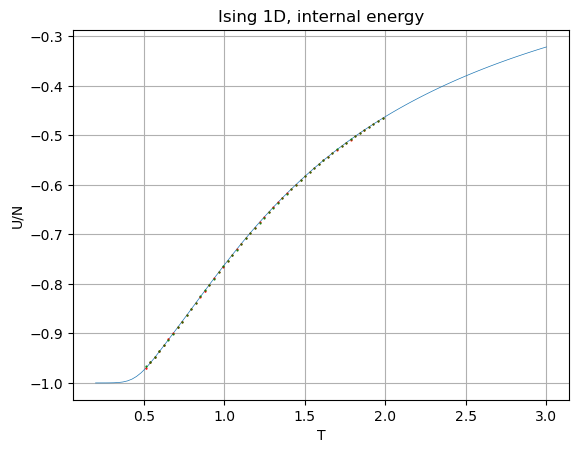

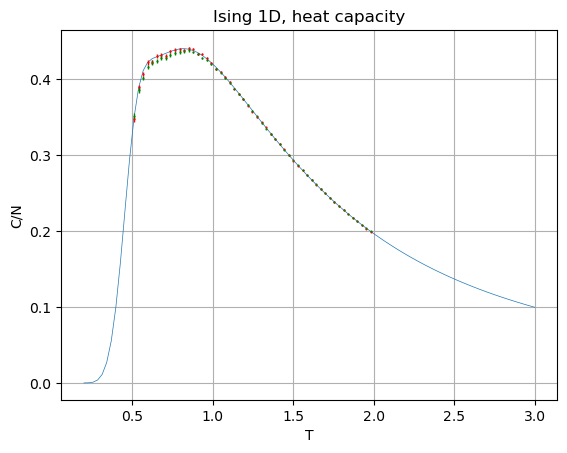

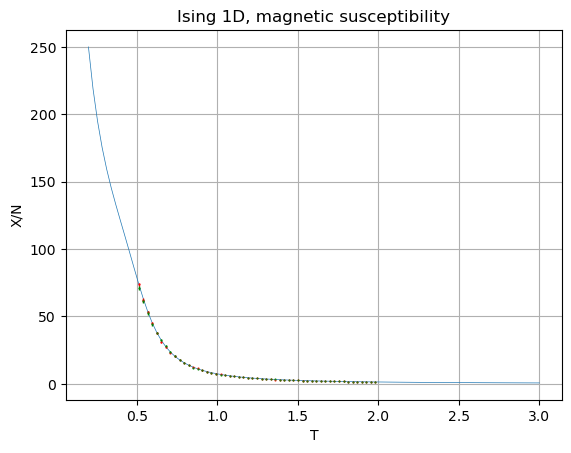

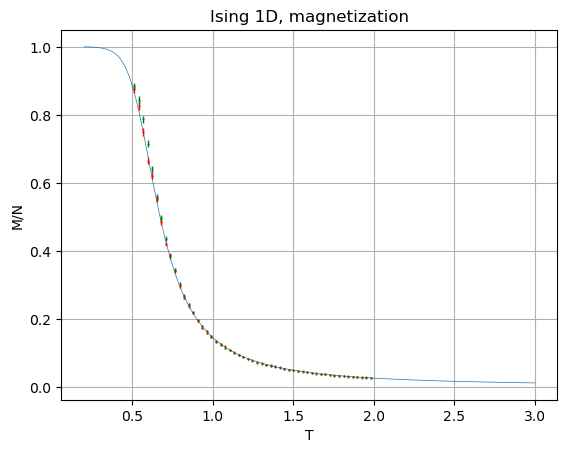

In [18]:
# Grafico dell'energia U(T)
plt.plot(T, e,linewidth=0.5)
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.grid(True)
# Eseguo l'esperimento se il risultato non è già presente
# nella cartella "results"
MonteCarloExperiment("risultati/output.ene.0","results/E(T)_Metropolis.txt",metro=1)
MonteCarloExperiment("risultati/output.ene.0","results/E(T)_Gibbs.txt",metro=0)
plt.show()


# Grafico della Capacità termica C(T)
plt.plot(T, heat,linewidth=0.5)
plt.title('Ising 1D, heat capacity')
plt.xlabel('T')
plt.ylabel('C/N')
plt.grid(True)
MonteCarloExperiment("risultati/output.heat.0","results/C(T)_Metropolis.txt",metro=1,\
                    nblk=40, nstep=20000)
MonteCarloExperiment("risultati/output.heat.0","results/C(T)_Gibbs.txt",metro=0,\
                    nblk=40, nstep=20000)
plt.show()


#Graficodella suscettibilità magnetica X(T)
plt.plot(T, X, linewidth=0.5)
plt.title('Ising 1D, magnetic susceptibility')
plt.xlabel('T')
plt.ylabel('X/N')
plt.grid(True)
MonteCarloExperiment("risultati/output.chi.0","results/X(T)_Metropolis.txt",metro=1)
MonteCarloExperiment("risultati/output.chi.0","results/X(T)_Gibbs.txt",metro=0)
plt.show()


plt.plot(T, M,linewidth=0.5)
plt.title('Ising 1D, magnetization')
plt.xlabel('T')
plt.ylabel('M/N')
plt.grid(True)
MonteCarloExperiment("risultati/output.mag.0","results/M(T)_Metropolis.txt",h=0.02,metro=1,\
                    nblk=40, nstep=20000)
MonteCarloExperiment("risultati/output.mag.0","results/M(T)_Gibbs.txt",h=0.02,metro=0,\
                    nblk=40, nstep=20000)
plt.show()

# Come si nota, il campionamento di Gibbs (in verde) sottostima la curva teorica del calore specifico. Ciò dipende dal fatto che nella simulazione, valutiamo il calore specifico con il teorema di fluttuazione-dissipazione, cioè lo valutiamo misurando le fluttuazioni del'energia, che poi vanno all'argomento del peso di Gibbs $e^{-\beta\Delta E}$. È possibile che la simulazione non sia pienamente ergodica, cioè non esplori completamente lo spazio fasi di tutti i possibili valori di energia. Si potrebbe migliorare l'ergodicità con un numero superiore di passi.